In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_x_coef(n):
    return (2 / np.pi) * ( (np.sin(np.pi * n) - np.pi * n * np.cos(np.pi * n)) / (n**2) )

def get_x_funcs(nums):
    array_list = list()
    x = np.arange(-np.pi, np.pi, 0.01)
    for i in range(nums):
        def func(x):
            return get_x_coef(i + 1) * np.sin((i + 1)*x)
        arrays = func(x)
        array_list.append(arrays)
    return np.stack(array_list), x

def plot_to_n(n):
    array_list, x = get_x_funcs(n)
    plt.plot(x, array_list.sum(axis = 0), label = str(n))
    plt.legend()


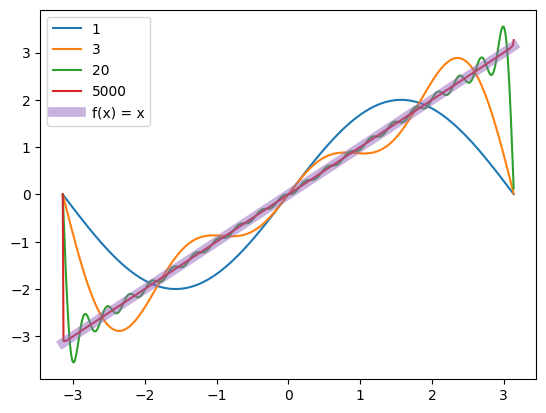

In [3]:
plot_to_n(1)
plot_to_n(3)
plot_to_n(20)
plot_to_n(5000)
plt.plot( np.arange(-np.pi, np.pi, 0.01),  np.arange(-np.pi, np.pi, 0.01), label = 'f(x) = x', linewidth = 7, alpha = 0.5)
plt.legend()

In [4]:
def get_expx_coef(n):
    # Recommand any online intergral calculator
    return {
        'sin' : np.exp(- np.pi)*((np.exp(2 * np.pi) + 1)* np.sin(np.pi * n) + (1 - np.exp(2*np.pi))*n*np.cos(np.pi*n)) / (np.pi * (n**2 + 1)) ,
        'cos' : np.exp(- np.pi)*((np.exp(2 * np.pi) + 1)*n*np.sin(np.pi * n) + (np.exp(2*np.pi)-1)*np.cos(np.pi*n)) / (np.pi * (n**2 + 1))
        }

def get_expx_funcs(nums):
    array_list = list()
    x = np.arange(-np.pi, np.pi, 0.01)
    for i in range(nums):
        def func(x):
            return get_expx_coef(i + 1)['sin'] * np.sin((i + 1)*x) + get_expx_coef(i + 1)['cos'] * np.cos((i + 1)*x)
        arrays = func(x)
        array_list.append(arrays)
    # MEAN 
    array_list.append(get_expx_coef(0)['cos']*np.ones(shape = x.shape) / 2) 
    return np.stack(array_list), x

def plot_to_n_exp(n):
    array_list, x = get_expx_funcs(n)
    plt.plot(x, array_list.sum(axis = 0), label = str(n))
    plt.legend()


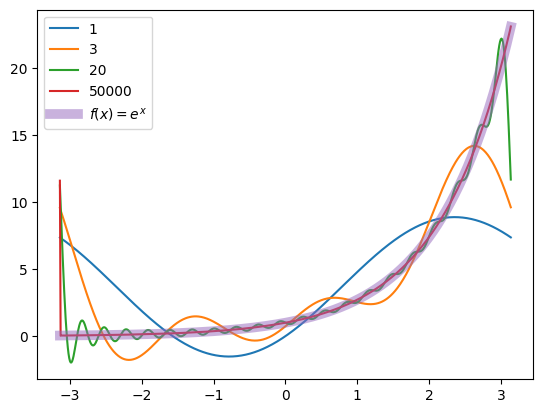

In [5]:
plot_to_n_exp(1)
plot_to_n_exp(3)
plot_to_n_exp(20)
plot_to_n_exp(50000)
plt.plot( np.arange(-np.pi, np.pi, 0.01),  np.exp(np.arange(-np.pi, np.pi, 0.01)), label = '$f(x) = e^x$', linewidth = 7, alpha = 0.5)
plt.legend()